## Data Visualization

In [16]:
import keras.layers as layers
import keras as keras
import tensorflow as tf

from keras import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Lambda, Input, Cropping2D, BatchNormalization, Dropout, ELU
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm, tqdm_notebook
import pandas as pd

In [17]:
data_path_csv = './data2/driving_log.csv'

annotations = pd.read_csv(data_path_csv)

In [18]:
np_annotations = annotations.values

In [4]:
center = [cv2.imread(os.path.join('.', 'data2', x[0])) for x in tqdm(np_annotations)]
angle = [float(x[3]) for x in tqdm(np_annotations)]

100%|██████████| 9297/9297 [00:00<00:00, 1271129.65it/s]


In [5]:
X_train = np.array(center)
Y_train = np.array(angle)

In [6]:
X_train_RGB = np.array([cv2.cvtColor(x, cv2.COLOR_BGR2RGB) for x in X_train])

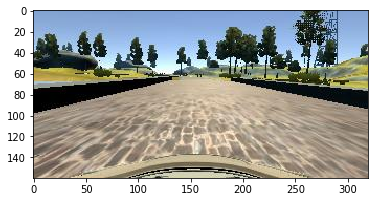

In [7]:
plt.imshow(X_train_RGB[0])

In [8]:
## DO THIS LATER!
def train_generator():
    pass
def val_generator():
    pass

## Build Neural Network

In [20]:
def build_model():
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255. - 0.5))) # Normalize
    model.add(Cropping2D(cropping=((70,25), (0, 0))))
    model.add(Conv2D(32, kernel_size = (5, 5), strides=(2, 2)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size = (5, 5), strides=(2, 2)))
    model.add(Activation('relu'))
    model.add(Conv2D(48, kernel_size = (5, 5), strides=(2, 2)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size = (3, 3), strides=(1, 1)))
    model.add(Conv2D(64, kernel_size = (3, 3), strides=(1, 1)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(1))
    return model;

In [22]:
model = build_model()

In [23]:
model.compile(loss='mse', optimizer='adam')

In [24]:
model.fit(X_train_RGB, Y_train, validation_split=0.2, shuffle=True, epochs = 10)

Train on 7437 samples, validate on 1860 samples
Epoch 1/10
7437/7437 [==============================] - 59s 8ms/step - loss: 0.0115 - val_loss: 0.0974
Epoch 2/10
7437/7437 [==============================] - 60s 8ms/step - loss: 0.0098 - val_loss: 0.1035
Epoch 3/10
7437/7437 [==============================] - 59s 8ms/step - loss: 0.0095 - val_loss: 0.1004
Epoch 4/10
7437/7437 [==============================] - 74s 10ms/step - loss: 0.0090 - val_loss: 0.0927
Epoch 5/10
7437/7437 [==============================] - 83s 11ms/step - loss: 0.0089 - val_loss: 0.0970
Epoch 6/10
7437/7437 [==============================] - 64s 9ms/step - loss: 0.0085 - val_loss: 0.0991
Epoch 7/10
7437/7437 [==============================] - 60s 8ms/step - loss: 0.0078 - val_loss: 0.0921
Epoch 8/10
7437/7437 [==============================] - 79s 11ms/step - loss: 0.0073 - val_loss: 0.1031
Epoch 9/10
7437/7437 [==============================] - 77s 10ms/step - loss: 0.0066 - val_loss: 0.1021
Epoch 10/10
7437/7437

In [25]:
from keras.models import load_model
model.save("speed_racer.h5")